In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Loading the dataset
df = pd.read_csv("sample.csv")

In [3]:
# Encoding categorical variables
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Splitting dataset
X = df.drop(columns=['Purchased'])
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Training the Decision Tree Model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

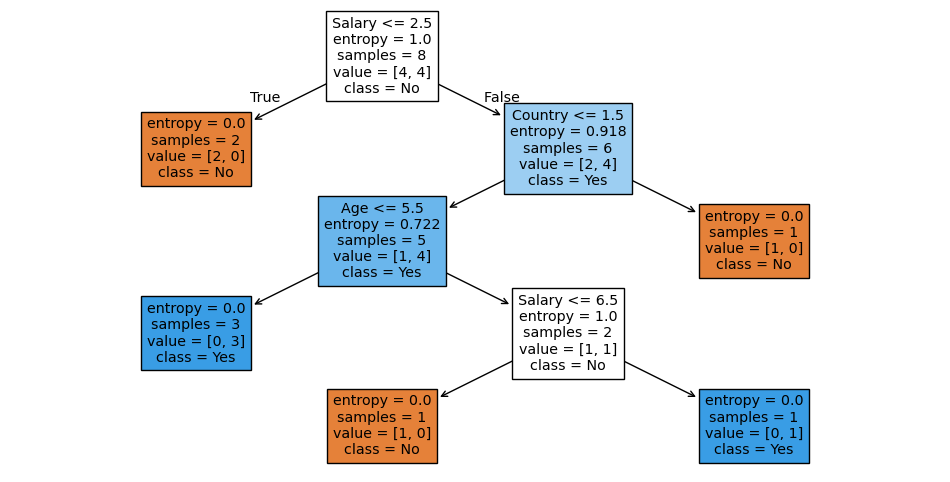

In [5]:
# Visualizing the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [6]:
# Making predictions
y_pred = dt_model.predict(X_test)


In [7]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print('Confusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.0

Confusion Matrix:
 [[0 1]
 [1 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



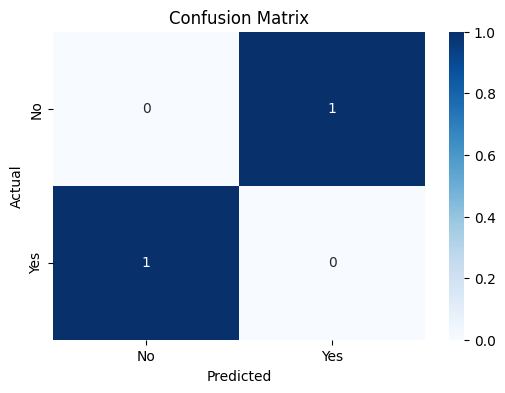

In [8]:
# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()